# Project 2 - Dimensionality Reduction and Unsupervised Learning
## Owen Queen, COSC 522

The point of this document is to show you how to run the code. This is not my report, nor is it a documentation, but rather a demonstration of the code mentioned in the report.

## Section 1: Clustering

### Important Note (please read before running):
Because these clustering algorithms are randomized there is a probability that they will be highly incorrect. From my observations, I have determined that the kMeans algorithm has a very low probability of this, but the Winner-Takes-All algorithm (WTA) has a higher probability of this failure (~20%). I will discuss this more in the Extra Credit section, but this should be known before running any of the code. The plots and tabular results were based on runs where the clustering algorithms showed relatively high accuracies.

### Task 2:
2. "Using the pima dataset. For fair comparison, you need to use the statistics derived from the training set to normalize the test set, like you did in Project 1. The clustering approaches are only given the normalized testset. Assume the number of clusters is 2. Also assume the prior probability ratio is 1:3 whenever needed."

In [3]:
# Importing needed modules and setting data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from parametric_model import MD_classifier
from kNN import kNN_classifier
from clustering_model import kmeans_classifier, wta_classifier
from clustering_model import plot_mem_changes

# Load our data:
pima_data = pd.read_csv("pima_data/pima_train.csv")

testing = "pima_data/pima_test.csv"
testing_df = pd.read_csv("pima_data/pima_test.csv")

**a)** "Plot a figure of "percentage of samples changing membership" vs. "epoch" for both kmeans and wta."

In [4]:
# First we'll run the kmeans model once:
kmeans_model = kmeans_classifier(testing_df)
kmeans_labels = kmeans_model.make_clusters(k = 2, show_runtime = True)


Epochs to Convergence: 13
kmeans (k = 2) Runtime: 0.6842801570892334 seconds


In [5]:
# Running the Winner-Takes-All clustering algorithm, similar to kmeans
wta_model = wta_classifier(pima_data)
wta_labels = wta_model.make_clusters(epsilon = 0.01, k = 2, sampling_method = '++')


Epochs to Convergence: 7
WTA (k = 2) Runtime: 1.0886039733886719 seconds


In this WTA run, note that I use '++' as the argument for the sampling method. This specifies that we will use the kmeans++ algorithm to choose our starting points. This increases the probability that WTA will not result in one major final cluster. As previously noted, this may occur when running this algorithm; if it does, simply run it again and it should not happen because the mechanisms for this algorithm are based on randomization.

Also note that the epsilon value was chosen based on the lecture notes. I have a more detailed discussion of epsilon values in the extra credit.

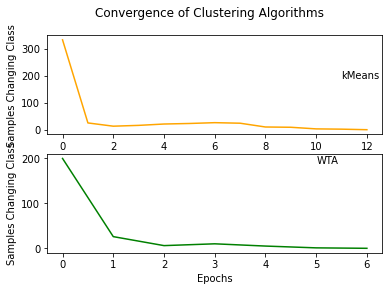

In [6]:
# Plot the label membership changes for both kMeans and WTA 
plot_mem_changes(kmeans_model, wta_model)

**b)** "Draw a table with six rows and five columns, showing the 1) overall accuracy, 2) class 0 accuracy, 3) class 1 accuracy, 4) run time, and 5) number of iterations to converge (only for kmeans and wta) if at all, of the six classification approaches, i.e., 1) Case 1, 2) Case 2, 3) Case 3, 4) kNN with k=??, 5) kmeans (k=2), and 6) wta. (Note: if you are not certain of your code from Project 1, you can use the posted solution and code to Project 1)."

In [7]:
# First we run Cases 1, 2, and 3 on the Pima data (using code from project 1):
parametric_model = MD_classifier.min_dist_classifier(pima_data)

acc = parametric_model.classify( test_data = testing, discriminant_type = "euclidean", prior_probs = [0.25, 0.75])
acc = parametric_model.classify( test_data = testing, discriminant_type = "mahalanobis", prior_probs = [0.25, 0.75])
acc = parametric_model.classify( test_data = testing, discriminant_type = "quadratic", prior_probs = [0.25, 0.75])

Overall Accuracy:    0.77108
Classwise accuracy for "0" class: 0.57798
Classwise accuracy for "1" class: 0.86547
euclidean Runtime: 0.06946992874145508 seconds

Overall Accuracy:    0.78614
Classwise accuracy for "0" class: 0.55046
Classwise accuracy for "1" class: 0.90135
mahalanobis Runtime: 0.0679318904876709 seconds

Overall Accuracy:    0.76807
Classwise accuracy for "0" class: 0.54128
Classwise accuracy for "1" class: 0.87892
quadratic Runtime: 0.10781002044677734 seconds



In [8]:
# Run kNN on Pima data:
kNN_model = kNN_classifier(pima_data)

kNN_model.classify(testing, k = 12)
# I decided not to use prior probabilities for kNN because my accuracy was better without it.

Overall Accuracy:    0.78012
Classwise accuracy for "0" class: 0.57798
Classwise accuracy for "1" class: 0.87892
k = 12 Runtime: 11.674745798110962 seconds



In [9]:
#Get the accuracy statistics for our previous runs of kMeans and WTA:
print("kMeans statistics:")
overall_acc_km = kmeans_model.acc_stats(labels = kmeans_labels, k = 2, show = True)

print("")
print("WTA statistics:")
overall_acc_wt = wta_model.acc_stats(labels = wta_labels, k = 2, show = True)

# You can reference our above runs of the model (in part a) for the runtimes

kMeans statistics:
Overall Accuracy:    0.70783
Classwise accuracy for "0.0" class: 0.69725
Classwise accuracy for "1.0" class: 0.71300

WTA statistics:
Overall Accuracy:    0.71500
Classwise accuracy for "0.0" class: 0.57353
Classwise accuracy for "1.0" class: 0.78788


### Task 3
3. "Using the full-color image. Each pixel of this color image has three components: red, green, and blue components. Each component is an 8-bit unsigned char. That is, each pixel is represented using 24 bits, a total of 2^24 possible colors. You are asked to use less number of bits to represent each pixel. For example, if you want to only use 256 colors to represent the original full-color image, then you are basically only using 8 bits to represent each pixel, instead of 2^24. We refer to the color image not showing its full-color potential as pseudo-color image."

a) "Draw a table with 8 rows and 2 columns showing the generated pseudocolor images with k = 256, 128, 64, and 32 different colors using kmeans and wta. Underneath each image, display the reconstruction error measured in terms of RMSE."

In [10]:
from cluster_image import run_clustering_for_img

# First we need to process the image:

image = plt.imread('flowersm.ppm')
m, n, d = image.shape # Saves original image shape

# Change image dimensions
img_data = np.reshape(image, (m * n, d) )
img_data = np.multiply( 1 / 255, img_data) # Normalize dataset down to values between 0 and 1
img_data = pd.DataFrame(img_data, columns = ['R', 'B', 'G'])

I do not show the construction of the table in this notebook, that was done in Microsoft Word. In order to run the clustering model for different k parameters, you can edit the variables `k` and `mod_name` in the code below. Set `mod_name` to "kmeans" to run kMeans or set it to "wta" to run Winner-Takes-All.

**Note**: You may receieve an Runtime warning when running kmeans. Ignore this as it does not affect accuracy. 

In [13]:
# Run the model
k = 32
mod_name = "wta"
# Run kMeans
n_img, rmse = run_clustering_for_img(img_data, k = k, model_type = mod_name)


Epochs to Convergence: 4
WTA (k = 32) Runtime: 17.820824146270752 seconds


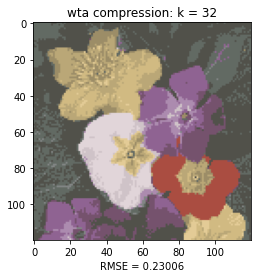

In [14]:
# Display the data from the run:
new_image = np.reshape(n_img, (m, n, d)) # Shape the data back into a regular image:
plt.imshow(new_image)

# Shows statistics on the image
plt.title("{} compression: k = {}".format(mod_name, k))
plt.xlabel("RMSE = {:.5f}".format(rmse))
plt.show()

## Section 2: Dimensionality Reduction

### Task 1
1. "Denote the normalized dataset as nX, the projected data from FLD as fX (1 dimension), and that from PCA as pX1 (only keep the major axis, i.e., the eigenvector that corresponds to the largest eigenvalue). Plot a 1 x 2 figure showing the histogram of fX and pX1. Calculate the projected means and variances of each class using fX and pX1. Calculate the error rate introduced by pX1."

PCA error rate: 0.6591154098040078


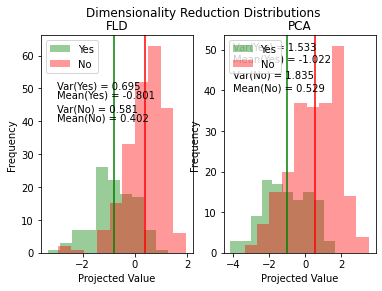

In [15]:
# Run PCA and FLD and show the projected datasets as histograms
from dim_reduce import *

# Perform linear discriminant analysis:
fX = fld(pima_data, testing_df)

# We'll leave out only one dimension for this reduction
pX1, error_rate = pca(pima_data, testing_df, num_dim = 1)

print("PCA error rate:", error_rate)

# Run the function to plot histograms
fld_and_pca_hists(fX, pX1)

### Task 2
2. "Assume the error rate for PCA is 15%. How many dimensions need to be kept? Project nX on this set of eigenvectors and denote the projected samples as pX. Apply Case 3 on nX, fX, and pX. Draw a table of 3 rows and 4 columns that measures overall accuracy, classwise accuracy, and runtime of Case 3 applied on nX, fX, and pX. Assuming 1:3 prior probability."

In [16]:
# Run pca with a tolerance of 0.15
pX_train, pX_test, error_rate = pca(pima_data, testing_df, tolerance = 0.15, return_both = True)

# The number of dimensions we need to keep will be given by (number of columns) - 1
print("Number of Dimensions Kept:", pX_train.shape[1] - 1)

Number of Dimensions Kept: 2


In [17]:
# Now we will run Case 3 classification on nX, fX, and pX.

# Run for regular data
nX_model = MD_classifier.min_dist_classifier(pima_data)
nX_test = pd.read_csv("pima_data/pima_test.csv")
nX_acc = nX_model.classify( test_data = nX_test, discriminant_type = "quadratic", prior_probs = [0.25, 0.75], test_is_pd = True)
        
# Run for FLD data
fX_train, fX_test = fld(pima_data, testing_df, return_both = True)
fX_model = MD_classifier.min_dist_classifier(fX_train)
fX_model.classify( test_data = fX_test, discriminant_type = "quadratic", prior_probs = [0.25, 0.75], test_is_pd = True)

# Run for PCA data:
pX_model = MD_classifier.min_dist_classifier(pX_train)
pX_acc = pX_model.classify( test_data = pX_test, discriminant_type = "quadratic", prior_probs = [0.25, 0.75], test_is_pd = True)

Overall Accuracy:    0.76807
Classwise accuracy for "0" class: 0.54128
Classwise accuracy for "1" class: 0.87892
quadratic Runtime: 0.09424114227294922 seconds

Overall Accuracy:    0.80120
Classwise accuracy for "0" class: 0.53211
Classwise accuracy for "1" class: 0.93274
quadratic Runtime: 0.2927119731903076 seconds

Overall Accuracy:    0.75602
Classwise accuracy for "0" class: 0.41284
Classwise accuracy for "1" class: 0.92377
quadratic Runtime: 0.10593295097351074 seconds



### Task 3
3. "Plot a figure of Case 3 classification accuracy vs. number of eigenvectors kept."

Note: The below function prints out accuracy statistics for reference as well as the plot of the Classification accuracy vs. eigenvectors kept at the bottom of the output.

Overall Accuracy:    0.73193
Classwise accuracy for "0" class: 0.34862
Classwise accuracy for "1" class: 0.91928
quadratic Runtime: 0.2810239791870117 seconds

Representation error rate with 1 dimensions = 0.65912
Overall Accuracy:    0.75602
Classwise accuracy for "0" class: 0.41284
Classwise accuracy for "1" class: 0.92377
quadratic Runtime: 0.11487579345703125 seconds

Representation error rate with 2 dimensions = 0.44426
Overall Accuracy:    0.73494
Classwise accuracy for "0" class: 0.44954
Classwise accuracy for "1" class: 0.87444
quadratic Runtime: 0.11789798736572266 seconds

Representation error rate with 3 dimensions = 0.31334
Overall Accuracy:    0.75602
Classwise accuracy for "0" class: 0.52294
Classwise accuracy for "1" class: 0.86996
quadratic Runtime: 0.11103487014770508 seconds

Representation error rate with 4 dimensions = 0.19849
Overall Accuracy:    0.77410
Classwise accuracy for "0" class: 0.57798
Classwise accuracy for "1" class: 0.86996
quadratic Runtime: 0.1185879

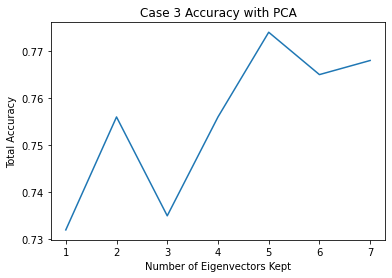

In [18]:
# Run the procedure that varies number of eigenvectors kept:
case3_acc_for_pca(pima_data, testing_df)

## Bonus

“Improve kmeans and wta to show better classification accuracy on the pima set. Hint: 1) how to incorporate prior probability in unsupervised learning? 2) how to consider not only the class mean but also the spread of samples? 3) Would using different k's help?”

### Choice of Intial Cluster Means
Note that one may still experience bad results from both the kMeans and WTA algorithms, even with optimized choices for intial cluster centers.

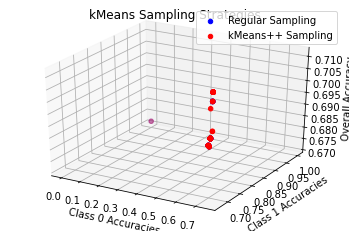

In [19]:
from bonus import *

# Make the 3D plot for kMeans
test_data = pd.read_csv("pima_data/pima_test.csv")

kmeans_results = run_sampling_strategies(test_data, times = 50, mod_name = 'kmeans')

plot_classwise_accs(kmeans_results["regular"], kmeans_results["++"], title = "kMeans Sampling Strategies")

In [20]:
# Run kMeans with kMeans++
kmeans_model = kmeans_classifier(test_data)
labels = kmeans_model.make_clusters(k = 2, sampling_method = "++", show_runtime = True)
acc = kmeans_model.acc_stats(labels, k = 2, show = True)


Epochs to Convergence: 10
kmeans (k = 2) Runtime: 0.7345089912414551 seconds
Overall Accuracy:    0.71084
Classwise accuracy for "0.0" class: 0.68807
Classwise accuracy for "1.0" class: 0.72197


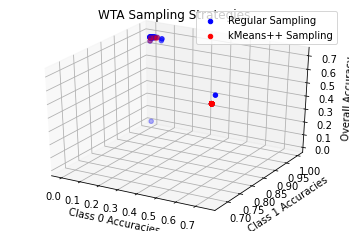

In [21]:
# Run 3D plot for WTA
wta_results = run_sampling_strategies(test_data, times = 50, mod_name = 'wta')

plot_classwise_accs(wta_results["regular"], wta_results["++"], title = "WTA Sampling Strategies")

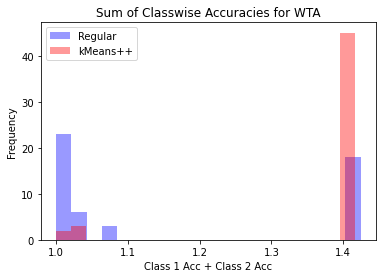

In [22]:
# Run sum of classwise accuracies for WTA
plot_sum_classwise(regular_accs = wta_results["regular"], pp_accs = wta_results["++"], title = "Sum of Classwise Accuracies for WTA")

In [23]:
# Run WTA classifier with kMeans++
model = wta_classifier(test_data)
l = model.make_clusters(epsilon = 0.01, k = 2, sampling_method = "++", show_runtime = True)
acc = model.acc_stats(labels = l, k = 2, show = True)


Epochs to Convergence: 16
WTA (k = 2) Runtime: 4.0653698444366455 seconds
Overall Accuracy:    0.69578
Classwise accuracy for "0.0" class: 0.74312
Classwise accuracy for "1.0" class: 0.67265


### Varying Epsilon Values

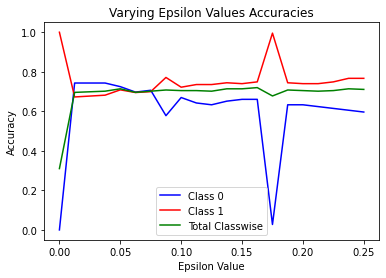

In [24]:
# Run varying epsilon plot
run_varying_epsilon_values(test_data = test_data, epsilons = np.linspace(0, 0.25, 21))